### Libraries Importing

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option("display.max_columns",None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

import os
for dirname,_,filenames in os.walk("input"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

input\Intrusion_data.csv


### Data Loading

In [2]:
df=pd.read_csv(filepath_or_buffer="input/Intrusion_data.csv")

***Preliminary Analysis***

In [3]:
df.shape

(125973, 42)

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


### Data Preprocessing

***NullValues Analysis***

In [5]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [6]:
df.xAttack.value_counts()

normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: xAttack, dtype: int64

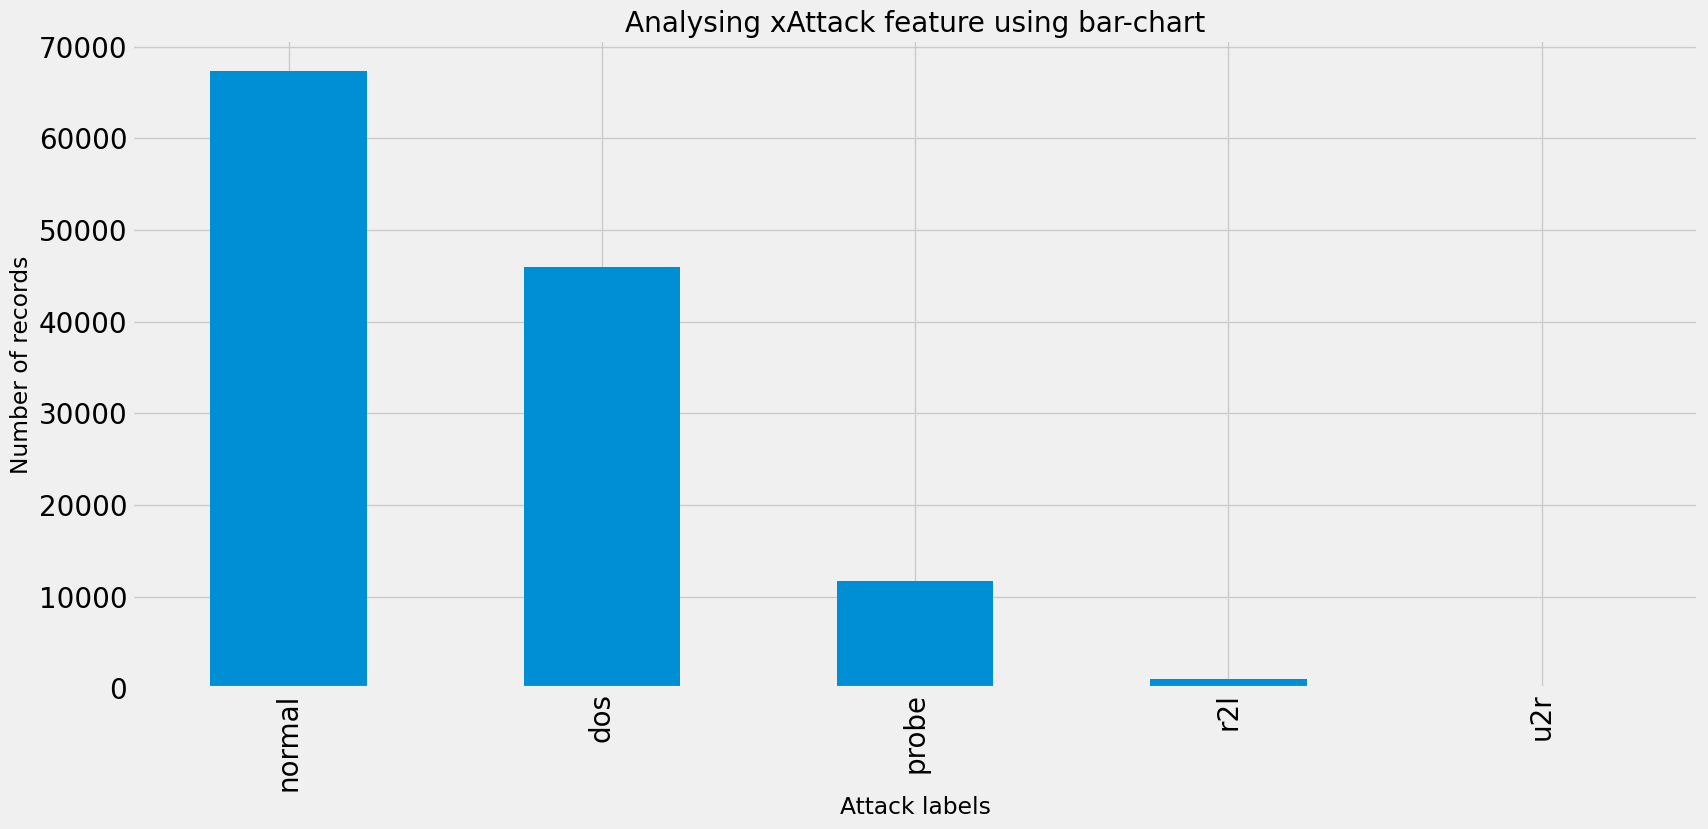

In [7]:
with plt.style.context(style="fivethirtyeight"):
    df["xAttack"].value_counts().plot.bar(figsize=(18,8),fontsize=20)
    plt.title(label="Analysing xAttack feature using bar-chart")
    plt.xlabel(xlabel="Attack labels")
    plt.ylabel(ylabel="Number of records")
    plt.show()

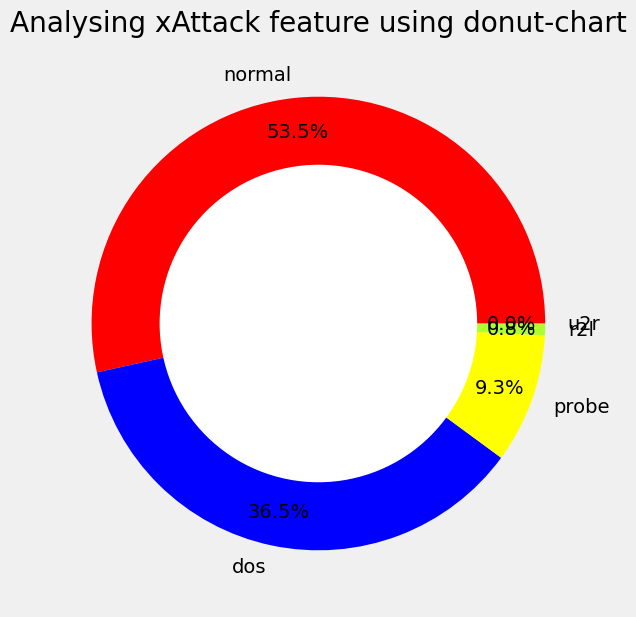

In [8]:
with plt.style.context(style="fivethirtyeight"):
    colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']
    plt.figure(figsize=(7,7))
    plt.pie(dict(df["xAttack"].value_counts()).values(), colors=colors, labels=dict(df["xAttack"].value_counts()).keys(),
            autopct='%1.1f%%', pctdistance=0.85)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(label="Analysing xAttack feature using donut-chart")
    plt.show()

In [9]:
df.protocol_type.unique()

array(['icmp', 'udp', 'tcp'], dtype=object)

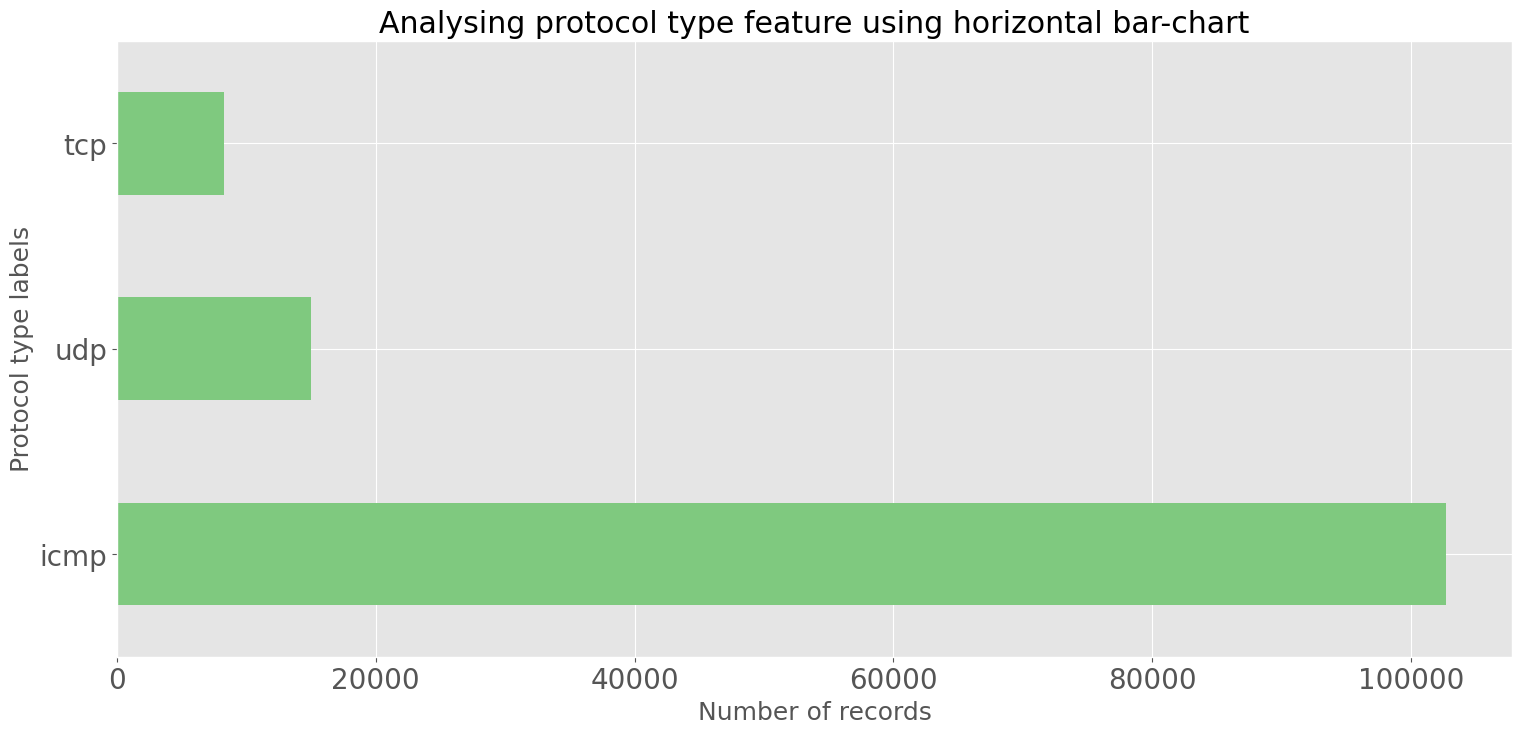

In [10]:
with plt.style.context(style="ggplot"):
    plt.rcParams["font.size"]=15
    df["protocol_type"].value_counts().plot.barh(figsize=(18,8),fontsize=20,colormap="Accent")
    plt.title(label="Analysing protocol type feature using horizontal bar-chart")
    plt.xlabel(xlabel="Number of records")
    plt.ylabel(ylabel="Protocol type labels")
    plt.show()

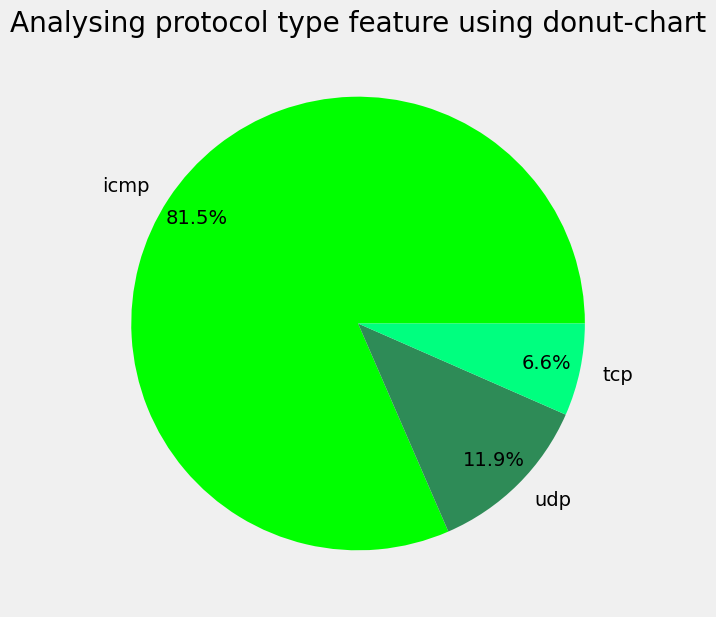

In [11]:
with plt.style.context(style="fivethirtyeight"):
    colors = ['lime', 'seagreen', 'springgreen']
    plt.figure(figsize=(7,7))
    plt.pie(dict(df["protocol_type"].value_counts()).values(), colors=colors, labels=dict(df["protocol_type"].value_counts()).keys(),autopct='%1.1f%%', pctdistance=0.85)
    plt.title(label="Analysing protocol type feature using donut-chart")
    plt.show()

In [12]:
staks=df[["protocol_type","xAttack"]]

In [13]:
staks.head()

,protocol_type,xAttack
0,icmp,normal
1,udp,normal
2,icmp,dos
3,icmp,normal
4,icmp,normal


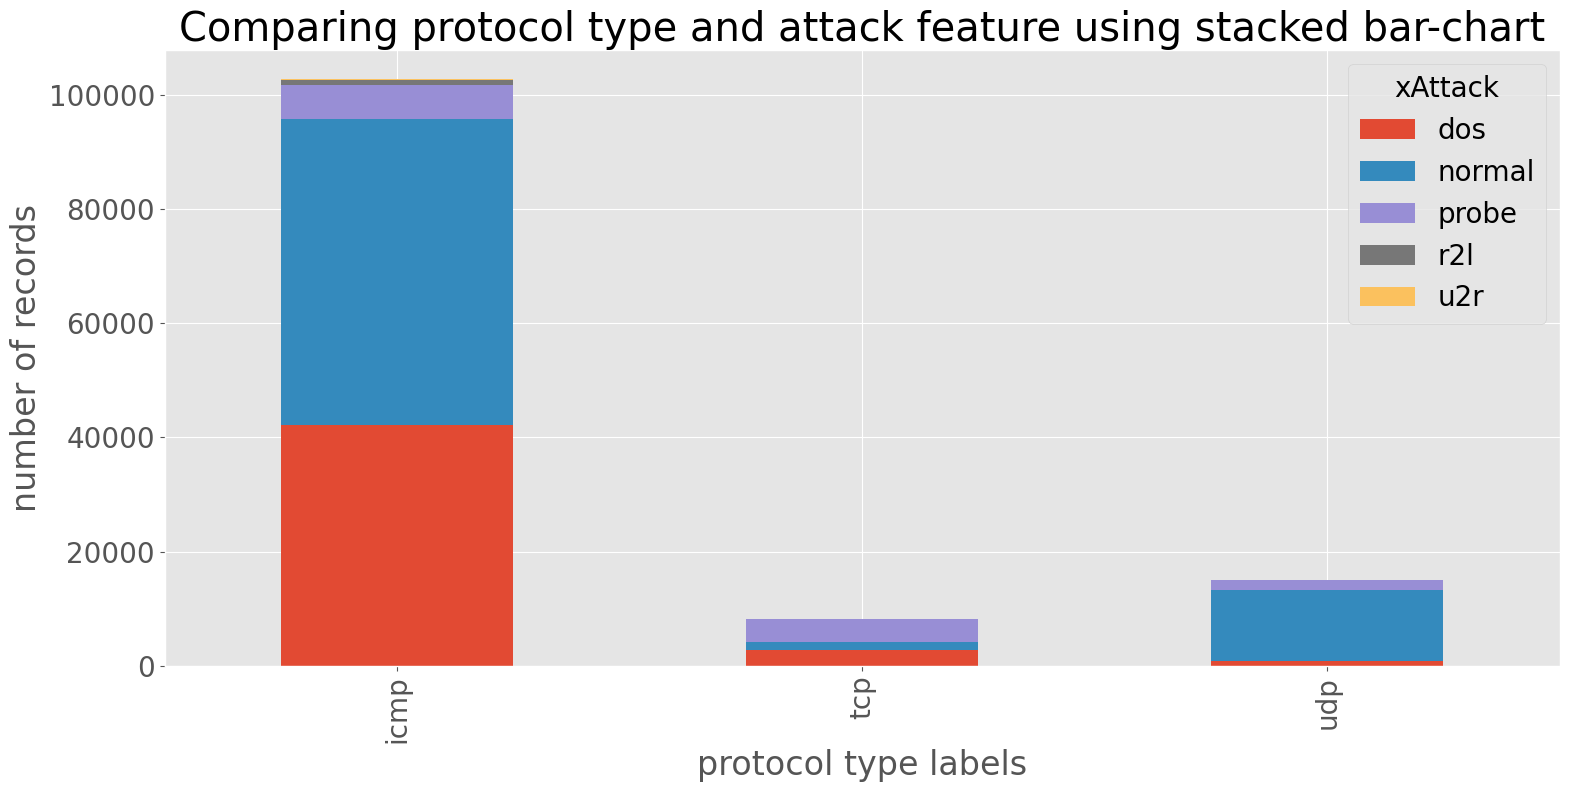

In [14]:
test5 = df.groupby(by=["protocol_type","xAttack"])["protocol_type"].count().unstack("xAttack").fillna(0)
with plt.style.context(style="ggplot"):
    plt.rcParams["font.size"]=20
    test5.plot(kind='bar', stacked=True,figsize=(18,8),fontsize=20)
    plt.title(label="Comparing protocol type and attack feature using stacked bar-chart")
    plt.xlabel(xlabel="protocol type labels")
    plt.ylabel(ylabel="number of records")
    plt.show()

In [15]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  int64  
 3   flag                         125973 non-null  int64  
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [17]:
print(df["protocol_type"].unique())
print(df["xAttack"].unique())

['icmp' 'udp' 'tcp']
['normal' 'dos' 'r2l' 'probe' 'u2r']


***Label Encoding***

In [18]:
protocol_numlabel={'icmp':0,'udp':1,'tcp':2}
xattack_numlabel={'normal':0,'dos':1,'r2l':2,'probe':3,'u2r':4}

df["protocol_type"]=df["protocol_type"].replace(protocol_numlabel)
df["xAttack"]=df["xAttack"].replace(xattack_numlabel)

In [19]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,1,45,2,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,50,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,0,25,2,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,0,25,2,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  int64  
 2   service                      125973 non-null  int64  
 3   flag                         125973 non-null  int64  
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [21]:
df["xAttack"].value_counts()

0    67343
1    45927
3    11656
2      995
4       52
Name: xAttack, dtype: int64

***Data Oversampling***

In [22]:
from sklearn.utils import resample
oversampled=[]
for i in range(5):
    records=df.loc[df["xAttack"]==i]
    oversampled.append(resample(records,n_samples=5000))
df=pd.concat(objs=oversampled,ignore_index=True)
df=df.sample(frac=1).reset_index(drop=True)

In [23]:
X=df.drop(labels="xAttack",axis=1)
y=df[["xAttack"]]

***Data Normalization***

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
scaled_X=pd.DataFrame(data=X_scaled,columns=X.columns)
scaled_X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.710145,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.821918,0.001957,0.05,0.0,0.93,1.0,0.00,1.00,0.0,1.000000,0.000000,0.00,1.00,0.00,0.00,0.08,0.00,0.92,1.00
1,0.0,0.0,0.869565,0.2,9.058208e-08,1.366478e-07,0.0,0.0,0.0,0.033333,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.00,0.0,1.00,1.0,1.00,0.00,0.0,0.011811,0.011811,1.00,0.00,0.25,0.00,0.25,0.25,0.75,0.75
2,0.0,0.0,0.782609,0.1,2.474702e-06,2.519204e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.00,0.0,0.00,0.0,1.00,0.00,0.0,0.200787,0.527559,0.83,0.08,0.02,0.01,0.00,0.00,0.00,0.00
3,0.0,0.0,0.347826,0.3,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007828,0.007828,1.00,1.0,0.00,0.0,1.00,0.00,0.0,1.000000,0.248031,0.25,0.02,0.00,0.00,1.00,1.00,0.00,0.00
4,0.0,0.0,0.710145,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217221,0.037182,0.00,0.0,1.00,1.0,0.17,0.06,0.0,1.000000,0.078740,0.08,0.06,0.00,0.00,0.00,0.00,1.00,1.00


In [25]:
import pickle
with open(file="models/scaler.pkl",mode="wb") as file:
    pickle.dump(obj=scaler,file=file)

### Data Splitting

In [26]:
X_train,X_test,y_train,y_test=train_test_split(scaled_X,y,test_size=0.2,random_state=42)

In [27]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(20000, 41) (5000, 41) (20000, 1) (5000, 1)


In [28]:
X_train.to_csv("splitted_data/X_train.csv",index=False)
X_test.to_csv("splitted_data/X_test.csv",index=False)
y_train.to_csv("splitted_data/y_train.csv",index=False)
y_test.to_csv("splitted_data/y_test.csv",index=False)

## Thank You